In [ ]:
from pandas import read_csv



In [ ]:
series = read_csv("/content/FINAL data.csv")


In [ ]:
series.head()

,Year,Month,Day,Hour,Min,Second,latitude,longitude,depth,mag,magType,place,depthError,magError
0,1905.0,5.0,11.0,17.0,9.0,1.46,25.967,143.332,15.0,6.78,mw,"Volcano Islands, Japan region",25.0,0.20
1,1905.0,6.0,2.0,5.0,39.0,39.60,33.715,131.759,60.0,6.91,mw,"31 km SSW of Hikari, Japan",15.4,0.53
2,1905.0,7.0,6.0,16.0,20.0,46.93,38.417,144.119,15.0,7.67,mw,"217 km ESE of Kamaishi, Japan",25.0,0.20
3,1906.0,1.0,21.0,13.0,49.0,33.57,34.175,138.025,300.0,7.40,mw,"50 km SSW of ?yama, Japan",25.0,0.30
4,1906.0,2.0,24.0,0.0,13.0,40.73,34.633,141.424,15.0,6.25,mw,"116 km ESE of Katsuura, Japan",15.9,0.20


In [ ]:
series.tail()

,Year,Month,Day,Hour,Min,Second,latitude,longitude,depth,mag,magType,place,depthError,magError
39746,2022.0,12.0,30.0,11.0,44.0,5.103,22.1303,143.5299,139.615,4.2,mb,NaN,8.969,0.118
39747,2022.0,12.0,30.0,14.0,10.0,6.152,36.1139,139.8576,56.826,4.4,mb,"5 km ENE of Sakai, Japan",7.978,0.130
39748,2022.0,12.0,30.0,16.0,44.0,45.298,26.9033,141.4839,12.646,4.4,mb,"Bonin Islands, Japan region",4.567,0.219
39749,2022.0,12.0,31.0,3.0,1.0,43.802,29.2311,130.4578,32.025,4.5,mb,"111 km S of Yudomari, Japan",6.634,0.128
39750,2022.0,12.0,31.0,3.0,27.0,38.307,19.1089,146.1845,89.055,4.0,mb,Mariana Islands region,7.074,0.258


In [ ]:
series.dtypes

Year          float64
Month         float64
Day           float64
Hour          float64
Min           float64
Second        float64
latitude      float64
longitude     float64
depth         float64
mag           float64
magType        object
place          object
depthError    float64
magError      float64
dtype: object

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sc


In [23]:
series = series[['Year', 'mag']]

In [26]:
bin_size = 10
start_year = 1905
end_year = 2022
#series = series[(series['Year'] >= 1905) & (series['Year'] <= 2022)]

In [ ]:
#year_range = end_year - start_year
#modulo = year_range % period_length

In [ ]:
#print(modulo)

7


In [27]:
full_bins = range(start_year, end_year - bin_size + 1, bin_size)
last_bin = (end_year - bin_size + 1, end_year)

bins = [f'{start}-{start+bin_size-1}' for start in full_bins]
bins.append(f'{last_bin[0]}-{last_bin[1]}')


In [29]:
#Add a new column 'bin' to the dataframe indicating the bin each year belongs to
data['bin'] = pd.cut(data['year'], bins=[start for start, _ in full_bins] + [last_bin[0], end_year + 1], labels=bins, right=False)


SyntaxError: ignored

In [ ]:
bin_means = series.groupby('bin')['mag'].mean()


In [31]:
starts = range(1905, 2022, 10)
final_start, final_end = starts[-1], 2022
period_length = 10
tuples = [(start, start + period_length) for start in starts]
tuples.append((final_start, final_end))
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')

# Create a dictionary for label replacement
original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1]) - 1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))

# Assign each row to a period
series['PERIOD'] = pd.cut(series['Year'], bins=bins, include_lowest=True, precision=0)
series['PERIOD'] = series['PERIOD'].astype("str")
data = series.replace({'PERIOD': label_dict})

# Group the data by the PERIOD column and calculate mean
grouped_data = data.groupby('PERIOD').mean().reset_index().drop('year', axis=1)

print(grouped_data)

ValueError: ignored

In [ ]:
# Plot the cyclic pattern
plt.figure(figsize=(10, 6))
bin_means.plot(kind='bar', color='blue')
plt.xlabel('Time Period')
plt.ylabel('Mean Magnitude')
plt.title('Cyclic Pattern of Mean Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
starts = np.arange(start_year, final_start, period_length).tolist()

In [ ]:
time= np.arange(0, 10, 0.1);
amplitude=np.sin(time)
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
ax[0].plot(time, amplitude)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].axhline(y=0, color='k')
amplitude_series = pd.Series(amplitude)
pd.plotting.lag_plot(amplitude_series, lag= 3, ax =ax[1])
plt.show()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '18-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '19-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '20-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '21-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_dat

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

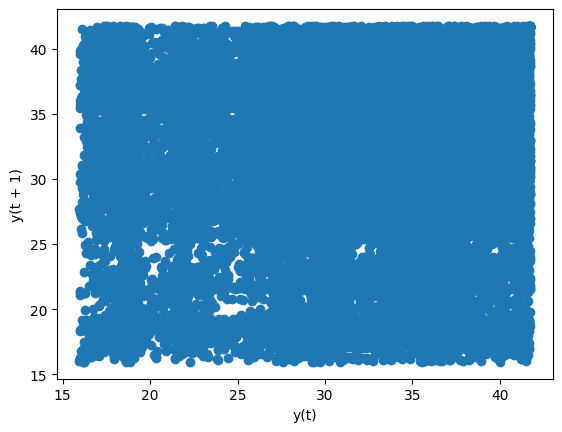

In [ ]:
import pandas as pd
data = pd.read_csv("/content/FINAL data-2.csv",
                   header=0, index_col=0, parse_dates=True,
                   squeeze=True)
data = data[['mag', 'latitude']].set_index(['mag'])

pd.plotting.lag_plot(data, lag=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '18-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '19-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '20-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '21-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_dat

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

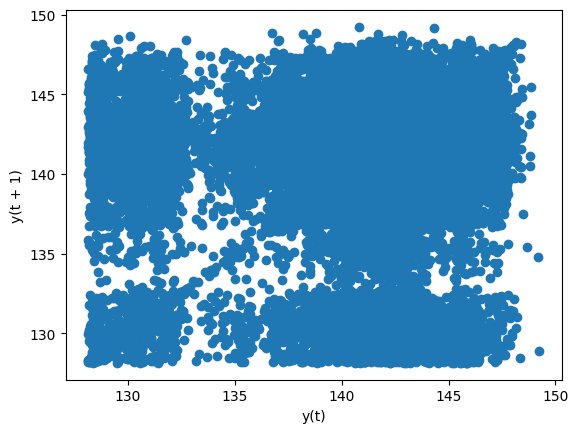

In [ ]:
import pandas as pd
data = pd.read_csv("/content/FINAL data-2.csv",
                   header=0, index_col=0, parse_dates=True,
                   squeeze=True)
data = data[['depthError', 'longitude']].set_index(['depthError'])

pd.plotting.lag_plot(data, lag=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '18-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '19-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '20-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '21-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_dat

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

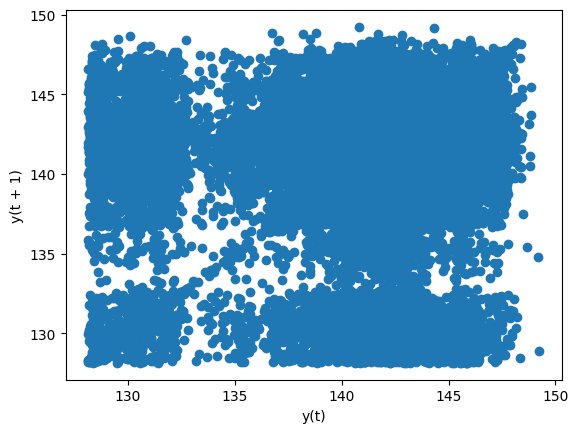

In [ ]:
import pandas as pd
data = pd.read_csv("/content/FINAL data-2.csv",
                   header=0, index_col=0, parse_dates=True,
                   squeeze=True)
data = data[['Year', 'longitude']].set_index(['Year'])

pd.plotting.lag_plot(data, lag=1)

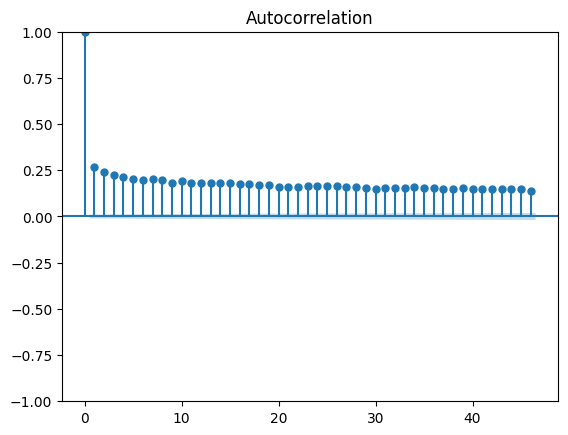

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
data = pd.read_csv('/content/FINAL data-2.csv')
data = data[['mag', 'latitude']].set_index(['mag'])
plot_acf(data)
plt.show()


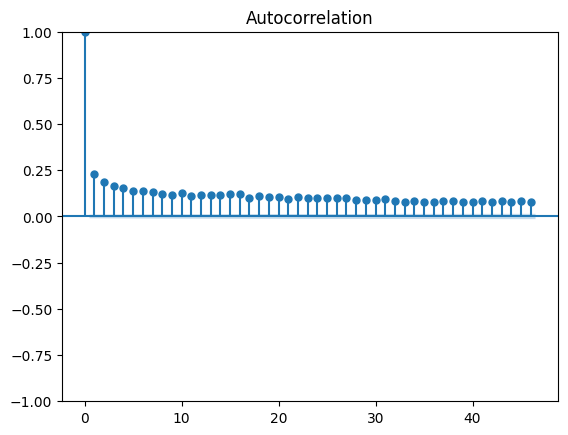

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
data = pd.read_csv('/content/FINAL data-2.csv')
data = data[['depthError', 'longitude']].set_index(['depthError'])
plot_acf(data)
plt.show()

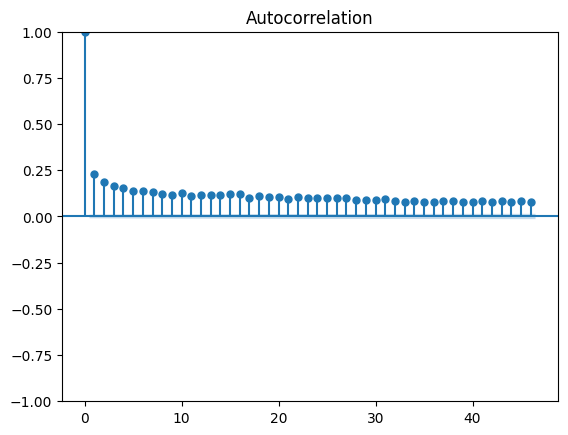

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
data = pd.read_csv('/content/FINAL data-2.csv')
data = data[['Year', 'longitude']].set_index(['Year'])
plot_acf(data)
plt.show()

      latitude
mag           
6.78   25.9670
6.91   33.7150
7.67   38.4170
7.40   34.1750
6.25   34.6330
...        ...
4.20   22.1303
4.40   36.1139
4.40   26.9033
4.50   29.2311
4.00   19.1089

[39747 rows x 1 columns]


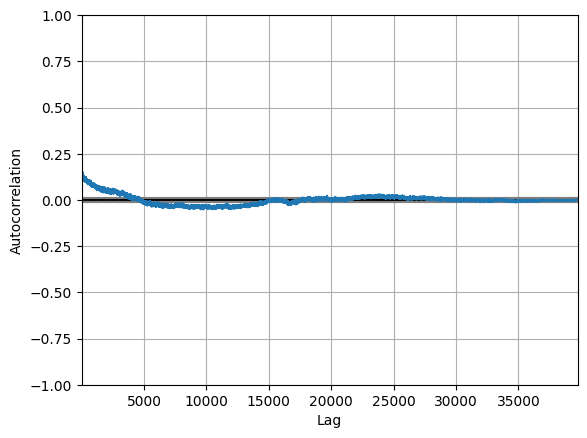

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
data = read_csv('/content/FINAL data-2.csv', header=0, index_col=0)
data = data[['mag', 'latitude']].set_index(['mag'])
print(data)
autocorrelation_plot(data)
pyplot.show()

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = read_csv('/content/FINAL data-2.csv', header=0, index_col=0)
data= series[['mag', 'latitude']]
#series = data[['mag', 'latitude']]
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
 return x

# walk-forward validation
predictions = list()
for x in test_X:
 yhat = model_persistence(x)
 predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

ValueError: ignored

In [ ]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('/content/FINAL data-2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '18-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '19-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '20-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '21-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_dat

ValueError: ignored

In [ ]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('/content/FINAL data-2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
 length = len(history)
 lag = [history[i] for i in range(length-window,length)]
 yhat = coef[0]
 for d in range(window):
 yhat += coef[d+1] * lag[window-d-1]
 obs = test[t]
 predictions.append(yhat)
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


IndentationError: ignored

In [ ]:
from pandas import read_csv
import numpy as np
from matplotlib import pyplot
#from numpy import arr
from pandas.plotting import lag_plot
series = read_csv('/content/FINAL data-2.csv', header=0, index_col=0)
SERIES= np.array(series)
lag_plot(SERIES)
pyplot.show()

AttributeError: ignored

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('/content/FINAL data-2.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

ValueError: ignored

In [ ]:
import pandas as pd
df = pd.DataFrame
print("DataFrame:")
print(df)
result = df.dtypes

print("Output:")
print(result)

Auto-Regressive model applied to the dataset to the column magnitude

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/FINAL data-2.csv")


In [ ]:
data.head()

,Date,Time,Year,Month,Day,Hour,Min,Second,latitude,longitude,depth,mag,magType,place,depthError,magError
0,11-05-1905,17:9:1.46,1905,5,11,17,9,1.46,25.967,143.332,15.0,6.78,mw,"Volcano Islands, Japan region",25.0,0.20
1,02-06-1905,5:39:39.6,1905,6,2,5,39,39.60,33.715,131.759,60.0,6.91,mw,"31 km SSW of Hikari, Japan",15.4,0.53
2,06-07-1905,16:20:46.93,1905,7,6,16,20,46.93,38.417,144.119,15.0,7.67,mw,"217 km ESE of Kamaishi, Japan",25.0,0.20
3,21-01-1906,13:49:33.57,1906,1,21,13,49,33.57,34.175,138.025,300.0,7.40,mw,"50 km SSW of ?yama, Japan",25.0,0.30
4,24-02-1906,0:13:40.73,1906,2,24,0,13,40.73,34.633,141.424,15.0,6.25,mw,"116 km ESE of Katsuura, Japan",15.9,0.20


In [ ]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

# Load the dataset
data = pd.read_csv("/content/FINAL data-2.csv")

# Select relevant columns for forecasting
data = data[['Date', 'mag']]
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime if needed
data = data.set_index('Date')

# Split the data into train and test sets
train_size = int(len(data) * 0.8)  # Adjust the train/test split ratio as needed
train_data, test_data = data[:train_size], data[train_size:]

# Train autoregressive model
lags = 7  # Number of lagged observations to include
model = AutoReg(train_data, lags=lags)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate evaluation metrics
mse = mean_squared_error(test_data, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(test_data, predictions)
mape = mean_absolute_percentage_error(test_data, predictions)
r2 = r2_score(test_data, predictions)

# Print evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("R-squared:", r2)




<ipython-input-8-c1a806f8b0ac>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime if needed


MSE: 0.14738800428693383
RMSE: 0.3839114537063642
MAE: 0.30486803509861343
MAPE: 0.06790744375194623
R-squared: -0.15164648757612453


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  

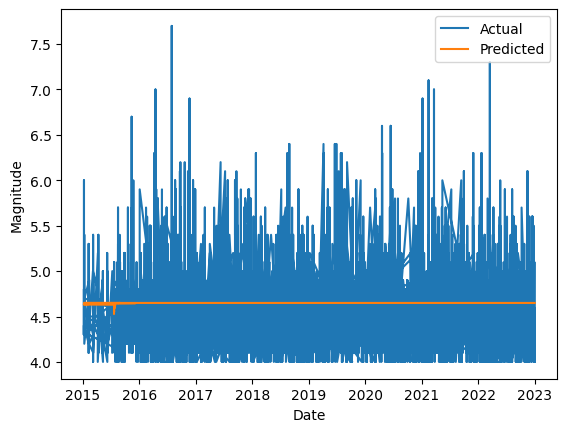

In [ ]:
# Visualize the actual values and predictions
import matplotlib.pyplot as plt

plt.plot(test_data.index, test_data['mag'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

Forecast till the year 2028

In [ ]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/FINAL data-2.csv")
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # Convert Date column to datetime with day-first format
data = data.set_index('Date')


In [ ]:
# Train autoregressive model on the entire data
lags = 7  # Number of lagged observations to include
model = AutoReg(data['mag'], lags=lags)
model_fit = model.fit()

# Generate forecast for the future
forecast_start_date = data.index[-1] + pd.DateOffset(days=1)  # Start forecasting from the day after the last available data point
forecast_end_date = pd.Timestamp(year=2028, month=12, day=31)  # Forecast till the end of 2028

# Create a sequence of future dates for forecasting
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

# Generate the forecast using the model
forecast = model_fit.predict(start=len(data), end=len(data) + len(forecast_dates) - 1)

# Create a DataFrame with the forecasted values and corresponding dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})
forecast_df = forecast_df.set_index('Date')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


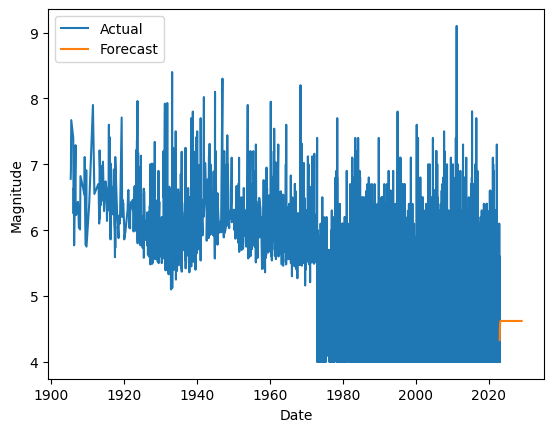

In [ ]:
plt.plot(data.index, data['mag'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

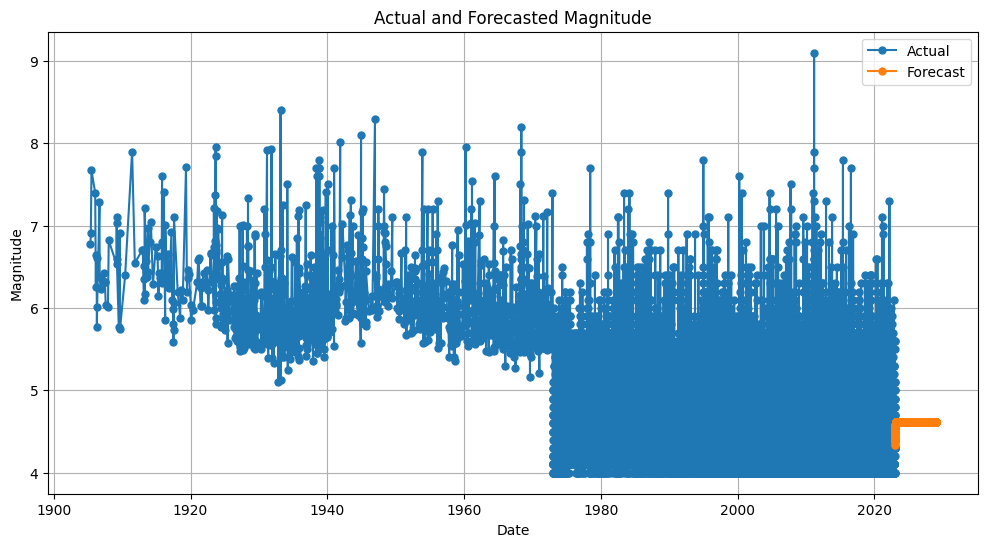

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['mag'], marker='o', markersize=5, label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], marker='o', markersize=5, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Actual and Forecasted Magnitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert actual_values to a pandas Series
actual_values = pd.Series(data['mag'].values[:len(forecasted_values)])

# Calculate evaluation metrics
mse = mean_squared_error(actual_values, forecasted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, forecasted_values)
mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100
smape = np.mean((np.abs(actual_values - forecasted_values) * 200) / (np.abs(actual_values) + np.abs(forecasted_values)))
mase = np.mean(np.abs(actual_values - forecasted_values)) / np.mean(np.abs(actual_values.diff(lags).dropna()))
r2 = r2_score(actual_values, forecasted_values)

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("SMAPE:", smape)
print("MASE:", mase)
print("R-squared:", r2)


MSE: 1.4607352746308446
RMSE: 1.2086088178690593
MAE: 0.9887171035258081
MAPE: nan
SMAPE: nan
MASE: nan
R-squared: -0.9759017835378736


<ipython-input-41-07ad96da98ad>:12: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100


In [ ]:


# Extract actual values
actual_values = data['mag']

# Extract forecasted values
forecasted_values = forecast_df['Forecast']

# Calculate evaluation metrics
mse = np.mean((actual_values - forecasted_values) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(actual_values - forecasted_values))
mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100
smape = np.mean(np.abs((actual_values - forecasted_values) / (actual_values + forecasted_values))) * 100
mase = np.mean(np.abs(actual_values - forecasted_values)) / np.mean(np.abs(actual_values.diff(lags).dropna()))

# Calculate R-squared
y_mean = np.mean(actual_values)
ss_tot = np.sum((actual_values - y_mean) ** 2)
ss_res = np.sum((actual_values - forecasted_values) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("SMAPE:", smape)
print("MASE:", mase)
print("R-squared:", r2)


MSE: nan
RMSE: nan
MAE: nan
MAPE: nan
SMAPE: nan
MASE: nan
R-squared: 1.0
